<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\akram\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\akram\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\akram\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots
using SpecialFunctions
using Plots

In [3]:
function sample_gaussian(𝜇, 𝜎, n)
    sample = []
    for i = 1:n;
        push!(sample, @.(((SpecialFunctions.erfinv((2*rand())-1))*(sqrt(2))*𝜎)+𝜇));
    end
    return (sample)
end
     

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [4]:
sample_1 = sample_gaussian(-1, 2, 10000)

10000-element Vector{Any}:
  0.7399454226279634
  0.44447699639042404
 -2.051522825376921
 -1.6699030558650443
 -1.7977430749108616
 -4.308008109627697
 -0.9523307928500104
 -4.6029633489064175
 -0.44463837403641715
  0.3953284426681092
  1.01513568062368
 -2.206302671455
 -4.499178265538773
  ⋮
 -2.018544197855448
 -1.4006119056254192
 -2.58079991331662
 -6.4407809520168655
 -5.869283903221566
 -2.392155925144081
 -2.334451040150958
 -3.6904168659561303
  0.8157212763522721
  0.6467790784864249
  0.24330950398629092
 -0.8449476140921437

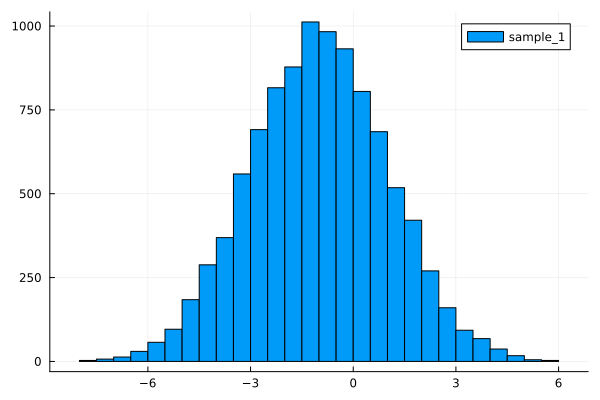

In [5]:
histogram(sample_1, labels="sample_1")

In [6]:
import Distributions 
using Distributions

In [7]:
x = -8:0.001:6
sample_2 = Distributions.pdf.(Distributions.Normal.(-1, 2), x)

14001-element Vector{Float64}:
 0.0004363413475228801
 0.00043710555878045894
 0.00043787099901516186
 0.00043863766999606706
 0.0004394055734944224
 0.0004401747112836551
 0.00044094508513936836
 0.0004417166968393453
 0.0004424895481635528
 0.0004432636408941397
 0.0004440389768154412
 0.00044481555771398246
 0.0004455933853784757
 ⋮
 0.00044481555771398246
 0.0004440389768154412
 0.0004432636408941397
 0.0004424895481635528
 0.0004417166968393453
 0.00044094508513936836
 0.0004401747112836551
 0.0004394055734944224
 0.00043863766999606706
 0.00043787099901516186
 0.00043710555878045894
 0.0004363413475228801

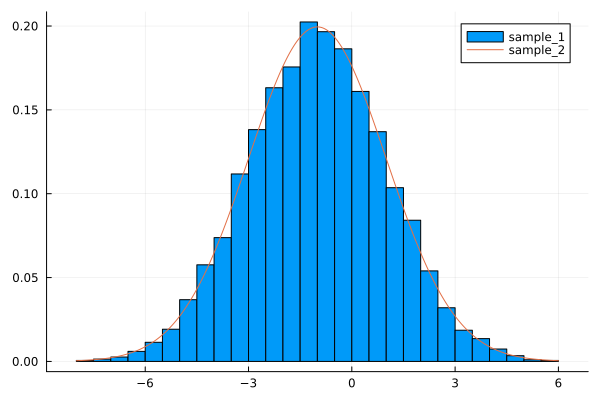

In [8]:
histogram(sample_1, normalize=true, labels="sample_1")
plot!(x, sample_2, labels="sample_2")